In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import cv2
from tensorflow.keras import datasets, layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
(training_images, training_labels),(testing_images,testing_labels) = datasets.cifar10.load_data()
training_images, testing_images = training_images / 255, testing_images/255

In [52]:
class_names = ['Plane','Car', 'Bird','Cat','Deer','Dog','Frog','Forest','Ship','Truck']

In [83]:
import os

def get_misclassified_filenames(directory):
    misclassified_filenames = []
    for filename in os.listdir(directory):
        if filename.startswith("misclassified_") and filename.endswith(".jpg"):
            misclassified_filenames.append(filename)
    return misclassified_filenames

# Usage
misclassified_directory = "misclassified_images"
misclassified_image_filenames = get_misclassified_filenames(misclassified_directory)

print(misclassified_image_filenames)


['misclassified_Cat_Dog.jpg', 'misclassified_Deer_Truck.jpg', 'misclassified_Forest_Deer.jpg', 'misclassified_Forest_Frog.jpg']


In [84]:
# Load and preprocess misclassified images from user feedback
# Assuming you have a list of misclassified image filenames from the CSV file
misclassified_dir = "misclassified_images"
misclassified_image_filenames = get_misclassified_filenames(misclassified_dir)


# Load misclassified images and preprocess them
misclassified_images = []
misclassified_correct_labels = []
misclassified_predicted_labels = []
os.makedirs(misclassified_dir, exist_ok=True)
csv_filename = "misclassified_metadata.csv"
misclassified_correct_labels = np.array(misclassified_correct_labels)
                                        
# Load misclassified images and preprocess them
misclassified_images = []
misclassified_correct_labels = []  # Create Python lists
misclassified_predicted_labels = []

# Initialize lists to hold data
misclassified_images = []
misclassified_correct_labels = []
misclassified_predicted_labels = []
class_name_to_index = {class_name: index for index, class_name in enumerate(class_names)}


for img_filename in misclassified_image_filenames:
    img_path = os.path.join(misclassified_dir, img_filename)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (32, 32))
    img = img / 255.0

    # Get correct and predicted labels from CSV file
    with open(csv_filename, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader) # Skip header row
        for row in csv_reader:
                if row[2] == img_filename:  # Assuming image filename is in the third column
                    correct_label = class_name_to_index[row[0]]
                    predicted_label = class_name_to_index[row[1]]
                    misclassified_correct_labels.append(correct_label)
                    misclassified_predicted_labels.append(predicted_label)

    misclassified_images.append(img)


# Convert Python lists to NumPy arrays after populating them with values
misclassified_correct_labels = np.array(misclassified_correct_labels)
misclassified_predicted_labels = np.array(misclassified_predicted_labels)

# Convert misclassified_images to a NumPy array and reshape
misclassified_images = np.array(misclassified_images)
misclassified_images = misclassified_images.reshape((-1, 32, 32, 3))
misclassified_correct_labels= misclassified_correct_labels.reshape(-1, 1)
# Concatenate arrays
combined_training_images = np.concatenate((training_images, misclassified_images), axis=0)
combined_training_labels = np.concatenate((training_labels, misclassified_correct_labels), axis=0)



In [85]:
misclassified_images.shape

(4, 32, 32, 3)

In [86]:
misclassified_correct_labels_reshaped = misclassified_correct_labels.reshape(-1)
misclassified_correct_labels.shape

(4, 1)

In [15]:
training_labels.shape

(50000, 1)

In [87]:
class_names = ['Plane','Car', 'Bird','Cat','Deer','Dog','Frog','Forest','Ship','Truck']

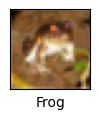

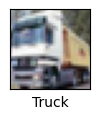

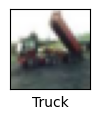

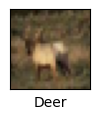

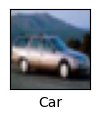

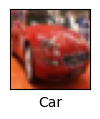

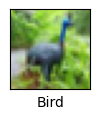

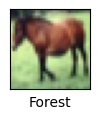

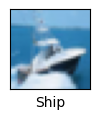

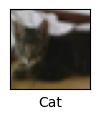

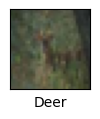

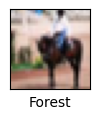

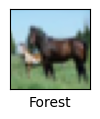

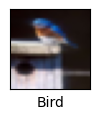

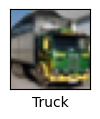

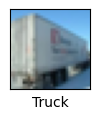

In [24]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])
    plt.show()

In [25]:
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

In [25]:
from keras import models, layers, optimizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [88]:
model.compile(optimizer= 'adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Create an ImageDataGenerator object with the desired data augmentation techniques
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

# Fit the ImageDataGenerator object to your training data 
datagen.fit(training_images)

# Use the ImageDataGenerator object to train your model
model.fit(datagen.flow(training_images, training_labels, batch_size=32),
          epochs=10, validation_data=(testing_images, testing_labels))

In [39]:
model.fit(training_images,training_labels, epochs= 20, validation_data = (testing_images, testing_labels))

Epoch 1/20
625/625 [==============================] - 16s 25ms/step - loss: 0.7089 - accuracy: 0.7465 - val_loss: 1.0787 - val_accuracy: 0.6340
Epoch 2/20
625/625 [==============================] - 16s 26ms/step - loss: 0.6540 - accuracy: 0.7699 - val_loss: 1.1337 - val_accuracy: 0.6313
Epoch 3/20
625/625 [==============================] - 15s 25ms/step - loss: 0.6186 - accuracy: 0.7810 - val_loss: 1.1629 - val_accuracy: 0.6317
Epoch 4/20
625/625 [==============================] - 15s 25ms/step - loss: 0.5629 - accuracy: 0.8002 - val_loss: 1.1191 - val_accuracy: 0.6438
Epoch 5/20
625/625 [==============================] - 14s 23ms/step - loss: 0.5277 - accuracy: 0.8118 - val_loss: 1.1375 - val_accuracy: 0.6495
Epoch 6/20
625/625 [==============================] - 15s 24ms/step - loss: 0.4723 - accuracy: 0.8320 - val_loss: 1.1741 - val_accuracy: 0.6435
Epoch 7/20
625/625 [==============================] - 16s 26ms/step - loss: 0.4355 - accuracy: 0.8457 - val_loss: 1.3080 - val_accuracy:

In [89]:
model.fit(combined_training_images, combined_training_labels, epochs=1, validation_data=(testing_images, testing_labels))
# Evaluate the model on the test set
loss, accuracy = model.evaluate(testing_images, testing_labels)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Save the updated model
model.save('updated_imageclassifier.model')

313/313 [==============================] - 2s 6ms/step - loss: 1.4426 - accuracy: 0.7072
Loss: 1.4426450729370117
Accuracy: 0.7071999907493591
INFO:tensorflow:Assets written to: updated_imageclassifier.model\assets


INFO:tensorflow:Assets written to: updated_imageclassifier.model\assets


In [55]:
model.fit(combined_training_images, combined_training_labels, epochs=1, validation_data=(testing_images, testing_labels))



ValueError: Data cardinality is ambiguous:
  x sizes: 50008
  y sizes: 50006
Make sure all arrays contain the same number of samples.

In [63]:
loss,accuracy = model.evaluate(testing_images, testing_labels)
print("Loss:", loss)
print("Accuracy:", accuracy )

125/125 [==============================] - 1s 7ms/step - loss: 1.0414 - accuracy: 0.6545
Loss: 1.0414267778396606
Accuracy: 0.6545000076293945


In [40]:
model.save('imageclassifier.model')


INFO:tensorflow:Assets written to: imageclassifier.model\assets


INFO:tensorflow:Assets written to: imageclassifier.model\assets


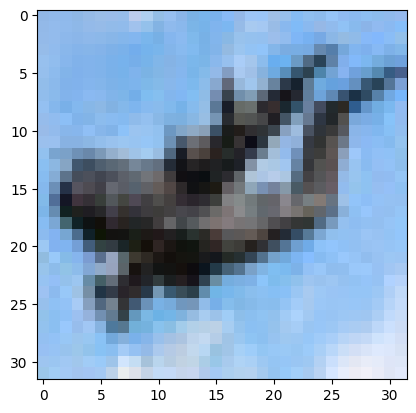

In [51]:
img = cv.imread('plane.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img,cmap = plt.cm.binary)


In [64]:
prediction = model.predict(np.array([img]) /255)
index = np.argmax(prediction)
individual_accuracy = prediction[0][index]
rounded_accuracy = "{:.2f}".format(individual_accuracy)
print('Prediction is', class_names[index], 'with an accuracy of:', rounded_accuracy, '%')


1/1 [==============================] - 0s 29ms/step
Prediction is Plane with an accuracy of: 0.64 %


In [3]:
model.input_shape

(None, 32, 32, 3)